In [1]:
import pandas as pd

# Replace the filename with the correct path from the sidebar (usually /content/filename.csv)
df = pd.read_csv('/content/traffic_cleaned.csv')
df.head()


,SCATS Number,Location,Date,Interval,Volume,Time,DateTime
0,2200,UNION_RD N of MAROONDAH_HWY,2006-10-01,V00,25,00:00,2006-10-01 00:00:00
1,2200,UNION_RD N of MAROONDAH_HWY,2006-10-02,V00,4,00:00,2006-10-02 00:00:00
2,2200,UNION_RD N of MAROONDAH_HWY,2006-10-03,V00,7,00:00,2006-10-03 00:00:00
3,2200,UNION_RD N of MAROONDAH_HWY,2006-10-04,V00,3,00:00,2006-10-04 00:00:00
4,2200,UNION_RD N of MAROONDAH_HWY,2006-10-05,V00,8,00:00,2006-10-05 00:00:00


In [2]:
window = 12
forecast = 3

x_all, y_all = [], []

for site, group in df.groupby('SCATS Number'):
    volumes = group['Volume'].values
    for i in range(len(volumes) - window - forecast + 1):
        x_all.append(volumes[i:i+window])
        y_all.append(volumes[i+window+forecast-1])

import numpy as np
X = np.array(x_all)
y = np.array(y_all)

print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')


Shape of X: (276404, 12)
Shape of y: (276404,)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=50, random_state=42)

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.4f}")


MAE: 17.36
RMSE: 30.32
R^2 Score: 0.8589


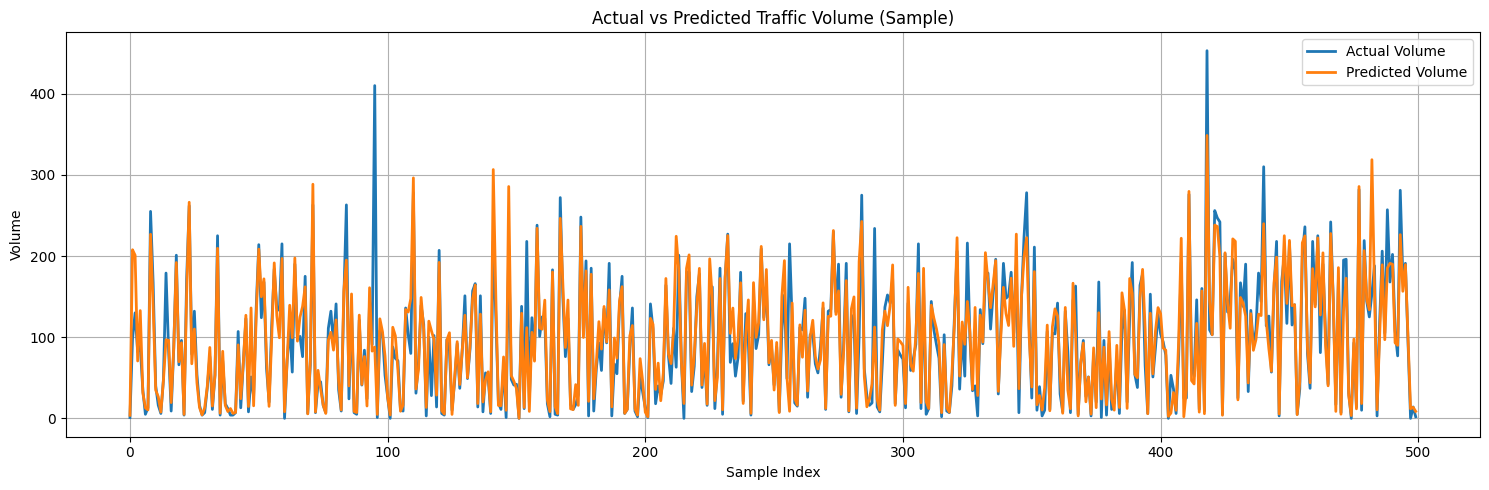

In [7]:
import matplotlib.pyplot as plt

# Plotting a sample of predicted vs actual volumes
sample_size = 500  # You can increase this if needed
plt.figure(figsize=(15, 5))
plt.plot(y_test[:sample_size], label='Actual Volume', linewidth=2)
plt.plot(y_pred[:sample_size], label='Predicted Volume', linewidth=2)
plt.title('Actual vs Predicted Traffic Volume (Sample)')
plt.xlabel('Sample Index')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


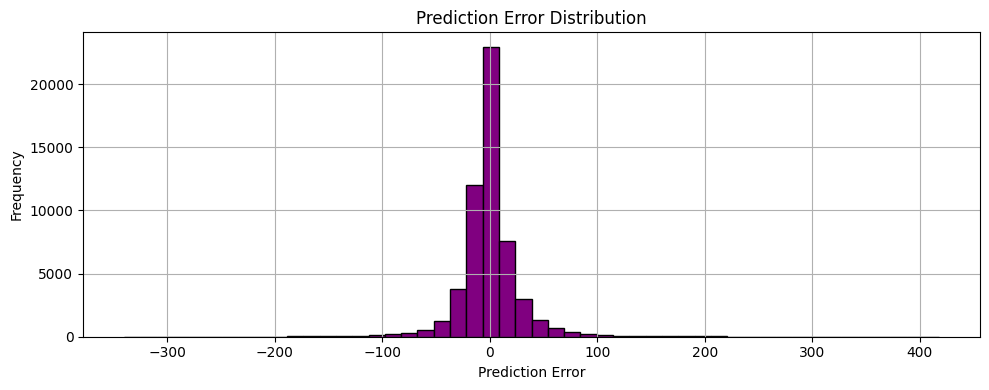

In [8]:
errors = y_test - y_pred
plt.figure(figsize=(10,4))
plt.hist(errors, bins=50, color='purple', edgecolor='black')
plt.title('Prediction Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
import joblib

joblib.dump(rf, '/content/random_forest.pkl')
print("Model saved as: random_forest.pkl")


Model saved as: random_forest_non_normalized.pkl
